#### Data set form 
https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition

In [192]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten
import cv2

In [193]:
# y_vals = {'angry' : 0, 'fear' : 1, 'happy' : 2, 'surprise' : 3}

In [194]:
# dir_to_find = 'validation'

# labels = os.listdir(f'./gesture_2/images/{dir_to_find}/')
# x = []
# y = []

# for i in labels:
#     print(i)
#     for j in os.listdir(f'./gesture_2/images/{dir_to_find}/{i}'):
#         img = cv2.imread(f'./gesture_2/images/{dir_to_find}/{i}/{j}', cv2.IMREAD_GRAYSCALE)
#         x.append(img)
#         y.append(y_vals[i])


# x = np.array(x)
# y = np.array(y)

In [195]:
# np.save('./train_gesture.npy' , x)
# np.save('./train_gesture_labels.npy' , y)

# np.save('./validation_gesture.npy' , x)
# np.save('./validation_gesture_labels.npy' , y)

In [196]:
X_train = np.load('./train_gesture.npy')
y_train = np.load('./train_gesture_labels.npy')

val_x = np.load('./validation_gesture.npy')
val_y = np.load('./validation_gesture_labels.npy')


In [197]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000)
val_ds = tf.data.Dataset.from_tensor_slices((val_x, val_y)).shuffle(1000)

In [198]:
def show_img(x, y):
    plt.gray()
    plt.title(str(y))
    plt.imshow(x)


def reshape_train(train_ds):
    return train_ds.map(lambda x, y: 
        (
            tf.reshape(x , (48 , 48 , 1)) 
            , y
        )
    ).batch(32)

def divide_into_train_and_val(val_ds_original, val_ratio = 0.8, test_ratio = 0.2):
    """
        pass the train dataset we will use
        train as -> train and val
        train will be divided into
        80% train and 20% val
    """
    DATASET_SIZE = len(val_ds_original)

    val_ds = val_ds_original.take(int(val_ratio * DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (48 , 48 , 1)) 
            , y
        )
    ).batch(32)

    test_ds = val_ds_original.skip(int(val_ratio * DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (48 , 48 , 1)) 
            , y
        )
    )

    return val_ds , test_ds

In [199]:
val_ds , test_ds = divide_into_train_and_val(val_ds)
train_ds = reshape_train(train_ds)

In [209]:
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu', input_shape = (48, 48, 1)),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Conv2D(filters = 32, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),

    Conv2D(filters = 64, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Flatten(),
    Dense(4, activation = 'softmax')
])

In [210]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [211]:
model.fit(train_ds, validation_data = val_ds, epochs=20)

Epoch 1/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8917 - loss: 1.8449 - val_accuracy: 0.0804 - val_loss: 4.3859
Epoch 2/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6782 - loss: 1.0485 - val_accuracy: 0.0845 - val_loss: 4.4432
Epoch 3/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7514 - loss: 1.0961 - val_accuracy: 0.0840 - val_loss: 5.9185
Epoch 4/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8018 - loss: 0.6709 - val_accuracy: 0.0848 - val_loss: 5.5835
Epoch 5/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8392 - loss: 0.6054 - val_accuracy: 0.0753 - val_loss: 6.6885
Epoch 6/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7850 - loss: 0.8240 - val_accuracy: 0.0834 - val_loss: 5.8656
Epoch 7/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7853 - loss: 1.0084 - val_accuracy: 0.0880 - val_loss: 7.3008
Epoch 8/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8141 - loss: 0.9325 - val_accuracy: 0.

class = 3 conf= 0.9546136


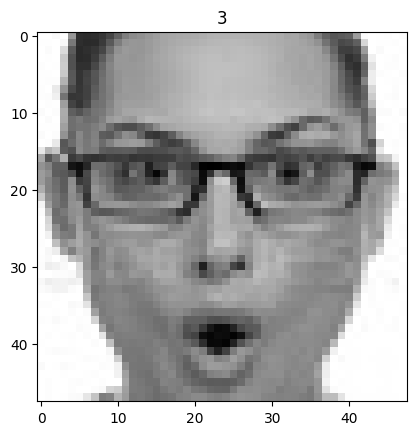

In [217]:
for x, y in test_ds.shuffle(1000).as_numpy_iterator():
    show_img(x , y)
    x = x.reshape(1, 48, 48, 1)
    predictions = model.predict(x, verbose=0)
    # Get predicted class and confidence
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    print('class =', predicted_class, 'conf=' , confidence)
    break


# x = x.reshape(1, 28, 56, 1)
# predictions = model.predict(x, verbose=0)
# Get predicted class and confidence
# predicted_class = np.argmax(predictions[0])
# confidence = predictions[0][predicted_class]
# print('class =', predicted_class, 'conf=' , confidence)